In [1]:
# Import libraries
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np

,Rating,Raters
0,4.26,1331732
1,4.25,979436
2,4.01,1119957
3,3.98,630669
4,4.04,516341


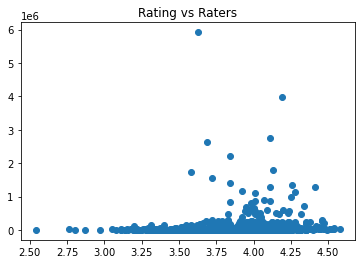

In [2]:
# Import dataset
data = pd.read_csv("HorrorBooks.csv")
data = data[["Rating", "Raters"]]
points = np.array(data)
xp = points[:,0]
yp = points[:,1]
plt.title("Rating vs Raters")
plt.scatter(x=xp, y=yp)
data.head()

In [3]:
# train K-means clustering
km = KMeans(n_clusters=3, init = "random", n_init=10, max_iter=300, tol=1e-04, random_state=0)
y_km = km.fit_predict(points)

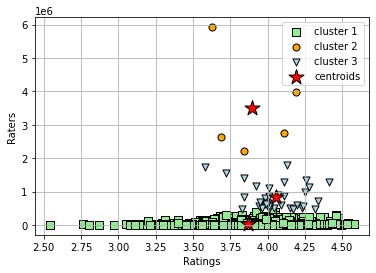

In [4]:
# plot the 3 clusters
plt.scatter(
    points[y_km == 0, 0], points[y_km == 0, 1],
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    points[y_km == 1, 0], points[y_km == 1, 1],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='cluster 2'
)

plt.scatter(
    points[y_km == 2, 0], points[y_km == 2, 1],
    s=50, c='lightblue',
    marker='v', edgecolor='black',
    label='cluster 3'
)

# plot the centroids
plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)
plt.legend(scatterpoints=1)
plt.xlabel("Ratings")
plt.ylabel("Raters")
plt.grid()
plt.show()

In [6]:
distortions = []
for i in range(1, 11):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(points)
    distortions.append(km.inertia_)

print(distortions)

[99422706760336.9, 38049048536787.23, 18111923636647.38, 12702011859104.965, 6952142307904.839, 6366677573716.687, 6172327278994.302, 6107426164624.19, 6088141969171.436, 3736425994977.8335]


In [8]:
from kneed import KneeLocator
kl = KneeLocator(range(1, 11), distortions, curve="convex", direction="decreasing")
kl.elbow

3

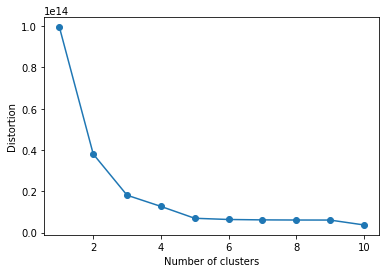

In [9]:
# plot
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()